### **machine learning laboratory**
### **ASSIGNMENT -- 01 : REGRESSSION**
### **PRAYAS MAZUMDER (2021CSB071)**

### **TASK - 1 :**  
Download House Prices Data Set from

https://www.kaggle.com/competitions/house-prices-advanced-regression-
techniques/data. Analyze the features of the dataset.

Upload the dataset in the “ML_DRIVE/Assign_1” folder, if executing through
COLAB. Access the dataset from there.

In [417]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **TASK - 02 :**
Read the dataset in the Pandas data frame. Estimate the missing values with any
technique of your choice. Divide the dataset into two sets using stratified k-fold
cross validation technique entitled to train and test set respectively.

In [418]:
import numpy as np
import pandas as pd
import sklearn

In [419]:
train = pd.read_csv('/content/drive/MyDrive/ML_DRIVE/Assign_1/train.csv')


In [420]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [421]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [422]:
pd.set_option('display.max_columns', None)

# Display the DataFrame information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [423]:
# Set display options to show all columns
pd.set_option('display.max_rows', None)

# Print the count of missing values for each column
print(train.isnull().sum())

# Reset display options to default if needed
pd.reset_option('display.max_rows')


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [424]:
# Check which columns have missing values and the total number of missing values
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
total_missing = missing_values.sum()

print("Columns with missing values:\n", missing_values)
print("Total number of missing values:", total_missing)


Columns with missing values:
 LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
Total number of missing values: 7829


In [425]:
# train = train[train['LotArea'].notna()]
# train = train[train['LotFrontage'].notna()]
# train = train[train['OverallQual'].notna()]
# train = train[train['OverallCond'].notna()]
# train = train[train['1stFlrSF'].notna()]
# train = train[train['GrLivArea'].notna()]
# print(train.isnull().sum())

In [426]:
# Impute missing values with mean for all numerical columns
# train.fillna(train.mean(), inplace=True)
# but this will show typeError since the code will also  try to fill in 'string' columns also ...


In [427]:
# Select only numeric columns
numeric_columns = train.select_dtypes(include=['number']).columns

# Calculate the mean for numeric columns
mean_values = train[numeric_columns].mean()

# Fill missing values in numeric columns with their mean values
train[numeric_columns] = train[numeric_columns].fillna(mean_values)



In [428]:
# Verify the changes

# Set display options to show all columns
pd.set_option('display.max_rows', None)

# Print the count of missing values for each column
print(train.isnull().sum())

# Reset display options to default if needed
pd.reset_option('display.max_rows')

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## **TASK - 3:**
**Use the linear regression method to estimate the slope and intercept for predicting
“SalePrice” based on “LotArea”.**

NOW IT'S NORMAL LINEAR REGRESSION WITHOUT K-FOLD CROSS VALIDATION TECHNIQUE


In [429]:

X = train['LotArea']
y = train['SalePrice']
###############################
X = X.values.reshape(-1, 1)
## reshape(-1,1) --> reshape your array with 1 column and as many rows as necessary to accommodate the data.
###############################
from sklearn.linear_model import LinearRegression
model = LinearRegression()
###############################
model.fit(X, y)
###############################
slope = model.coef_[0]
intercept = model.intercept_
print("Slope:", slope)
print("Intercept:", intercept)




Slope: 2.0999719517076745
Intercept: 158836.1518968766


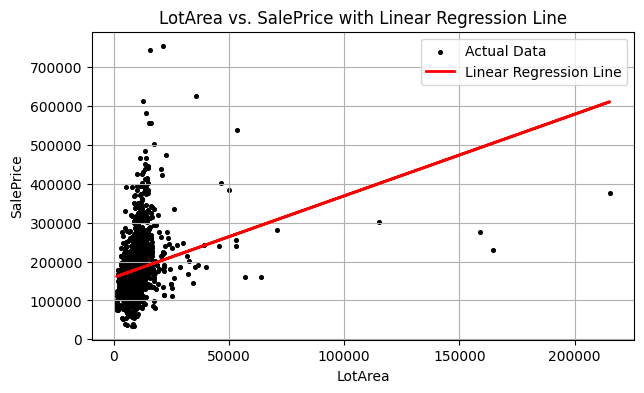

Slope: 2.0999719517076745
Intercept: 158836.1518968766


In [430]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Extract and reshape data
X = train['LotArea'].values.reshape(-1, 1)
y = train['SalePrice']

# Initialize and train the model
model = LinearRegression()
model.fit(X, y)

# Compute slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Predict SalePrice using the linear regression model
y_pred = model.predict(X)

# Plot original data and the regression line
plt.figure(figsize=(7, 4))

# Scatter plot of original data
plt.scatter(train['LotArea'], train['SalePrice'], color='black',s=7, label='Actual Data')

# Plot regression line
plt.plot(train['LotArea'], y_pred, color='red', linewidth=2, label='Linear Regression Line')

# Add labels and title
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('LotArea vs. SalePrice with Linear Regression Line')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print slope and intercept
print("Slope:", slope)
print("Intercept:", intercept)


It was normal linear regression without splitting the dataset . Now we will do the k-fold cross validation .

In [431]:
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LinearRegression

# # Initialize KFold with 10 splits
# kf = KFold(n_splits=10, shuffle=True, random_state=1)

# # Define the features and target variable
# X = train[['LotArea']]  # Only 'LotArea' as feature for linear regression
# y = train['SalePrice']

# # Lists to store results
# slopes = []
# intercepts = []

# # Perform K-Fold cross-validation
# for train_index, test_index in kf.split(X, y):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     # Initialize and fit the linear regression model
#     lr = LinearRegression()
#     lr.fit(X_train, y_train)

#     # Store the slope and intercept
#     slopes.append(lr.coef_[0])
#     intercepts.append(lr.intercept_)

# # Calculate the average slope and intercept
# average_slope = sum(slopes) / len(slopes)
# average_intercept = sum(intercepts) / len(intercepts)

# print(f"Average Slope: {average_slope}, Average Intercept: {average_intercept}")


### **USING STRATIFIED K-FOLD CALCULATING AVG SLOPE AND INTERCEPT**

In [432]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression

# Initialize KFold with 10 splits
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Define the features and target variable
X = train[['LotArea']]  # Only 'LotArea' as feature for linear regression
y = train['SalePrice']

# Lists to store results
slopes = []
intercepts = []

# Perform K-Fold cross-validation
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Initialize and fit the linear regression model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Store the slope and intercept
    slopes.append(lr.coef_[0])
    intercepts.append(lr.intercept_)

# Calculate the average slope and intercept
average_slope = sum(slopes) / len(slopes)
average_intercept = sum(intercepts) / len(intercepts)

print(f"Average Slope: {average_slope}, Average Intercept: {average_intercept}")


Average Slope: 2.150409411530409, Average Intercept: 158333.21330222161


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


## **TASK - 4**

**Use the multiple regression method to estimate the value of the
weights/coefficients for predicting “SalePrice” based on the following features:    
a. Model 1: LotFrontage, LotArea    
b. Model 2: LotFrontage, LotArea, OverallQual, OverallCond   
c. Model 3: LotFrontage, LotArea, OverallQual, OverallCond, 1stFlrSF,
GrLivArea**

In [433]:
from sklearn.model_selection import train_test_split

# Define features and target variable for multiple regression
X = train[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']]
y = train['SalePrice']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multiple regression models
models = {
    'Model 1': ['LotFrontage', 'LotArea'],
    'Model 2': ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond'],
    'Model 3': ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']
}

coefficients = {}

for model_name, features in models.items():
    lr = LinearRegression()
    lr.fit(X_train[features], y_train)
    coefficients[model_name] = lr.coef_

print("Coefficients for Multiple Regression Models:")

print("in matrix form")

coefficients

Coefficients for Multiple Regression Models:
in matrix form


{'Model 1': array([878.35692772,   1.36301833]),
 'Model 2': array([ 3.13239146e+02,  1.16801841e+00,  4.22319778e+04, -3.44539815e+02]),
 'Model 3': array([-4.55138322e+00,  6.64513829e-01,  3.10746027e+04,  7.98497131e+02,
         3.21753838e+01,  3.86702649e+01])}

### **TASK -  5**
**Calculate and compare the Mean Squared Error, R2 score for each of the model
using the training set and test set.**

In [434]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate models
results = {}

for model_name, features in models.items():
    lr = LinearRegression()
    lr.fit(X_train[features], y_train)

    y_train_pred = lr.predict(X_train[features])
    y_test_pred = lr.predict(X_test[features])

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    results[model_name] = {
        'MSE Train': mse_train,
        'MSE Test': mse_test,
        'R2 Train': r2_train,
        'R2 Test': r2_test
    }

results


{'Model 1': {'MSE Train': 5187706359.348735,
  'MSE Test': 6391769244.787395,
  'R2 Train': 0.1302435172744162,
  'R2 Test': 0.1666887336814591},
 'Model 2': {'MSE Train': 2031959572.8670032,
  'MSE Test': 2326923040.5910625,
  'R2 Train': 0.6593272847927243,
  'R2 Test': 0.696633105589339},
 'Model 3': {'MSE Train': 1594275967.6229157,
  'MSE Test': 1702504242.0348244,
  'R2 Train': 0.7327081060409688,
  'R2 Test': 0.7780401776863712}}

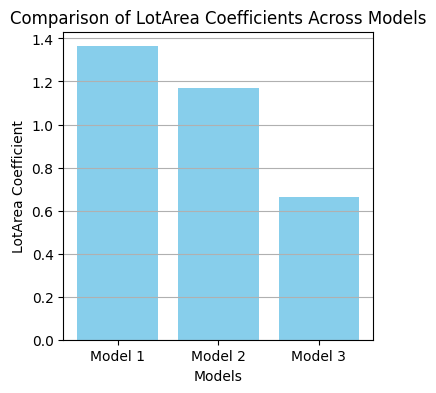

In [435]:
import matplotlib.pyplot as plt


# Extract the 'LotArea' coefficient
lotarea_coefficients = {
    model_name: coef[X.columns.get_loc('LotArea')]
    for model_name, coef in coefficients.items()
}

# Prepare data for plotting
x_axis = list(lotarea_coefficients.keys())
y_axis = list(lotarea_coefficients.values())

# Plotting the LotArea coefficients
plt.figure(figsize=(4, 4))
plt.bar(x_axis, y_axis, color='skyblue')
plt.xlabel('Models')
plt.ylabel('LotArea Coefficient')
plt.title('Comparison of LotArea Coefficients Across Models')
plt.grid(axis='y')

# Show plot
plt.show()


# ***TASK - 06***

**Use the multiple regression method to estimate the value of the
weights/coefficients for predicting “SalePrice” based on the following set of
mixed (numerical and categorical) features:   
a. Model 4: LotArea, Street   
b. Model 5: LotArea, OverallCond, Street, Neighborhood   
c. Model 6: LotArea, OverallCond, Street, 1stFlrSF, Neighborhood, Year**

NOW BOTH NUMERIC AND CATEGORICAL DATA

In [436]:
# Impute missing values with mean for numeric columns
numeric_columns = train.select_dtypes(include=['number']).columns
train[numeric_columns] = train[numeric_columns].fillna(train[numeric_columns].mean())

# One-Hot Encode categorical columns
categorical_columns = ['Street', 'Neighborhood']
train = pd.get_dummies(train, columns=categorical_columns, drop_first=True)

# Define features and target variable
target = 'SalePrice'

# Define the feature sets for each model
models = {
    'Model 4': ['LotArea'] + [col for col in train.columns if 'Street' in col],
    'Model 5': ['LotArea', 'OverallCond'] + [col for col in train.columns if 'Street' in col] + [col for col in train.columns if 'Neighborhood' in col],
    'Model 6': ['LotArea', 'OverallCond', '1stFlrSF'] + [col for col in train.columns if 'Street' in col] + [col for col in train.columns if 'Neighborhood' in col] + ['YearBuilt']
}

coefficients = {}

# Split the dataset into training and testing sets
X = train.drop(columns=[target])
y = train[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for model_name, features in models.items():
    lr = LinearRegression()
    lr.fit(X_train[features], y_train)
    coefficients[model_name] = lr.coef_

# Print the coefficients for each model
for model_name, coefs in coefficients.items():
    print(f"Coefficients for {model_name}: ")
    for feature, coef in zip(models[model_name], coefs):
        print(f"{feature}: {coef}")
    print("\n")

Coefficients for Model 4: 
LotArea: 2.058735451948339
Street_Pave: 112065.68969939703


Coefficients for Model 5: 
LotArea: 1.466441819740597
OverallCond: 6298.142053030679
Street_Pave: 70594.27676318017
Neighborhood_Blueste: -70804.13405178426
Neighborhood_BrDale: -89308.11446192182
Neighborhood_BrkSide: -81155.89405096998
Neighborhood_ClearCr: -19638.40286989787
Neighborhood_CollgCr: -1323.7484900059824
Neighborhood_Crawfor: -2145.7451610475537
Neighborhood_Edwards: -75292.99939793273
Neighborhood_Gilbert: -7075.166682276926
Neighborhood_IDOTRR: -94056.94658590072
Neighborhood_MeadowV: -90611.36915561432
Neighborhood_Mitchel: -49116.37438172643
Neighborhood_NAmes: -59619.17527331945
Neighborhood_NPkVill: -51541.33952317985
Neighborhood_NWAmes: -20309.111437096723
Neighborhood_NoRidge: 114126.60231838218
Neighborhood_NridgHt: 109447.94421786438
Neighborhood_OldTown: -74572.77214418305
Neighborhood_SWISU: -60232.003565952036
Neighborhood_Sawyer: -70569.62856679654
Neighborhood_SawyerW:

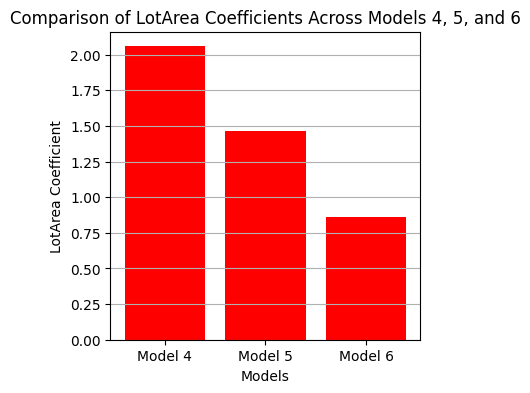

In [437]:
import matplotlib.pyplot as plt

# Extract the 'LotArea' coefficient from each model
lotarea_coefficients = {}
for model_name, features in models.items():
    # Find the index of 'LotArea' in the feature list
    lotarea_index = features.index('LotArea')
    # Extract the coefficient for 'LotArea'
    lotarea_coefficients[model_name] = coefficients[model_name][lotarea_index]

# Prepare data for plotting
x_axis = list(lotarea_coefficients.keys())
y_axis = list(lotarea_coefficients.values())

# Plotting the LotArea coefficients
plt.figure(figsize=(4, 4))
plt.bar(x_axis, y_axis, color='red')
plt.xlabel('Models')
plt.ylabel('LotArea Coefficient')
plt.title('Comparison of LotArea Coefficients Across Models 4, 5, and 6')
plt.grid(axis='y')

# Show plot
plt.show()


*****************************************************************************
******************************************************************************
# **TASK - 7**
**Compare the feature “LotArea” weights/coefficients for all the six trained models
and plot a graph using the Matplotlib library.**

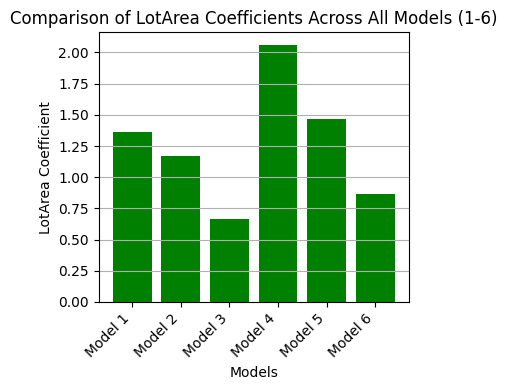

In [438]:
import matplotlib.pyplot as plt

# Define feature sets for models 1-3 as well
models_1_to_3 = {
    'Model 1': ['LotFrontage', 'LotArea'],
    'Model 2': ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond'],
    'Model 3': ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']
}


models_4_to_6 = {
    'Model 4': ['LotArea'] + [col for col in train.columns if 'Street' in col],
    'Model 5': ['LotArea', 'OverallCond'] + [col for col in train.columns if 'Street' in col] + [col for col in train.columns if 'Neighborhood' in col],
    'Model 6': ['LotArea', 'OverallCond', '1stFlrSF'] + [col for col in train.columns if 'Street' in col] + [col for col in train.columns if 'Neighborhood' in col] + ['YearBuilt']
}

# Combine all models including 1-3 and 4-6
models_combined = {
    **models_1_to_3,
    **models_4_to_6
}

# Re-train models to get the coefficients (assuming `run_regression_model` and `train` are already defined)
coefficients_combined = {}
for model_name, features in models_combined.items():
    lr = LinearRegression()
    lr.fit(X_train[features], y_train)
    coefficients_combined[model_name] = lr.coef_

# Extract 'LotArea' coefficient from each model
lotarea_coefficients_combined = {}
for model_name, features in models_combined.items():
    if 'LotArea' in features:
        lotarea_index = features.index('LotArea')
        lotarea_coefficients_combined[model_name] = coefficients_combined[model_name][lotarea_index]

# Prepare data for plotting
x_axis_combined = list(lotarea_coefficients_combined.keys())
y_axis_combined = list(lotarea_coefficients_combined.values())

# Plotting the LotArea coefficients for all models
plt.figure(figsize=(4, 4))
plt.bar(x_axis_combined, y_axis_combined, color='green')
plt.xlabel('Models')
plt.ylabel('LotArea Coefficient')
plt.title('Comparison of LotArea Coefficients Across All Models (1-6)')
plt.grid(axis='y')

# Show plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


-----------------------------------------------------------------------------
-----------------------------------------------------------------------------

# **TASK - 8**
**Use the polynomial regression of degree 2 and 3, to estimate the value of the
weights/coefficients for predicting “SalePrice” based on “LotArea”. Print the
graph on the training and test set (Bonus).**

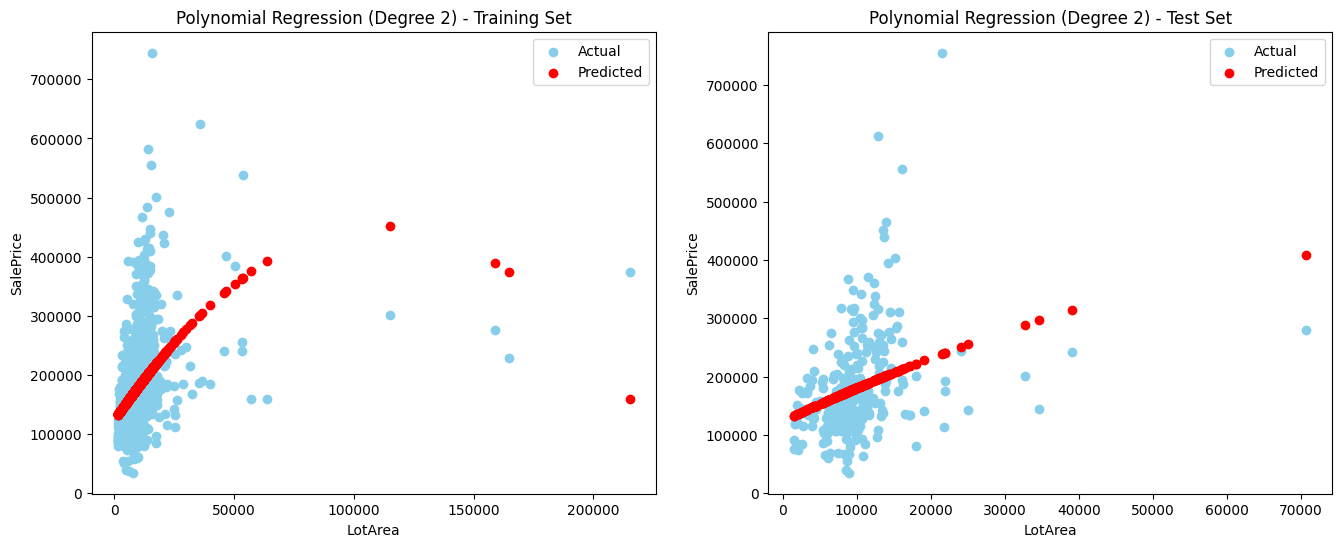

Degree 2 - Coefficients: [ 0.00000000e+00  5.91809188e+00 -2.67418161e-05], Intercept: 124328.09159012116


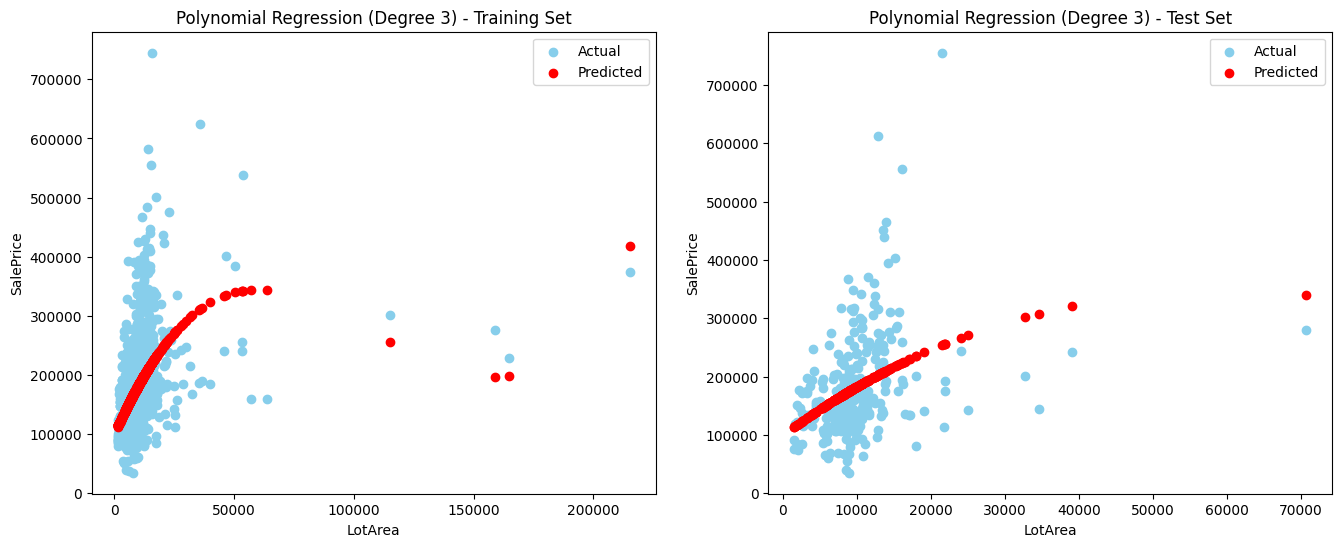

Degree 3 - Coefficients: [ 0.00000000e+00  9.31490646e+00 -1.06768921e-04  3.26961569e-10], Intercept: 99948.71235871255


In [439]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# Define the feature and target variable
X = train[['LotArea']]
y = train['SalePrice']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define degrees for polynomial regression
degrees = [2, 3]

# Function to plot the results
def plot_polynomial_regression(degree, X_train, y_train, X_test, y_test):
    # Create polynomial features
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train the model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict on training and test set
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Plot training set results
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(X_train, y_train, color='skyblue', label='Actual')
    plt.scatter(X_train, y_train_pred, color='red', label='Predicted')
    plt.title(f'Polynomial Regression (Degree {degree}) - Training Set')
    plt.xlabel('LotArea')
    plt.ylabel('SalePrice')
    plt.legend()

    # Plot test set results
    plt.subplot(1, 2, 2)
    plt.scatter(X_test, y_test, color='skyblue', label='Actual')
    plt.scatter(X_test, y_test_pred, color='red', label='Predicted')
    plt.title(f'Polynomial Regression (Degree {degree}) - Test Set')
    plt.xlabel('LotArea')
    plt.ylabel('SalePrice')
    plt.legend()

    plt.show()

    return model.coef_, model.intercept_

# Perform polynomial regression and plot for each degree
for degree in degrees:
    coef, intercept = plot_polynomial_regression(degree, X_train, y_train, X_test, y_test)
    print(f'Degree {degree} - Coefficients: {coef}, Intercept: {intercept}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


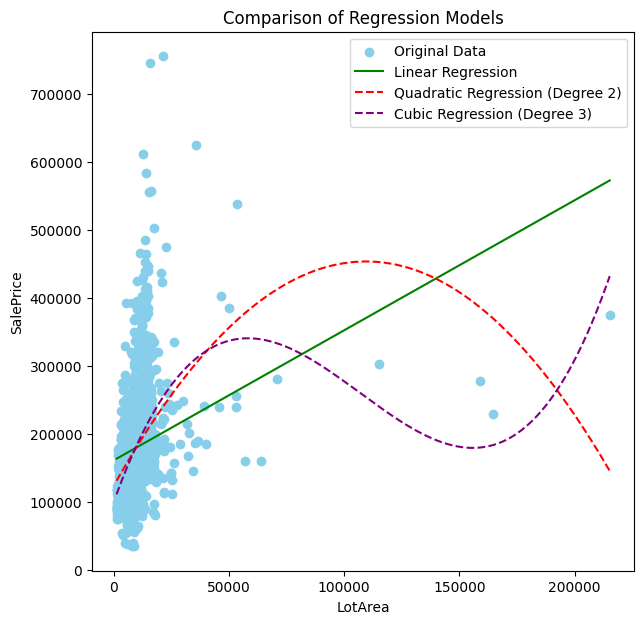

In [440]:

# Create polynomial features
def get_polynomial_features(degree):
    poly = PolynomialFeatures(degree)
    return poly.fit_transform(X)

# Fit linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Fit polynomial regression (degree 2 and 3)
poly2 = PolynomialFeatures(2)
poly3 = PolynomialFeatures(3)
X_poly2 = poly2.fit_transform(X)
X_poly3 = poly3.fit_transform(X)
poly2_reg = LinearRegression()
poly2_reg.fit(X_poly2, y)
poly3_reg = LinearRegression()
poly3_reg.fit(X_poly3, y)

# Generate values for plotting
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
X_poly2_range = poly2.transform(X_range)
X_poly3_range = poly3.transform(X_range)

# Predict values
y_linear_pred = linear_reg.predict(X_range)
y_poly2_pred = poly2_reg.predict(X_poly2_range)
y_poly3_pred = poly3_reg.predict(X_poly3_range)

# Plot all in one figure
plt.figure(figsize=(7, 7))

# Original Data
plt.scatter(X, y, color='skyblue', label='Original Data')

# Linear Regression
plt.plot(X_range, y_linear_pred, color='green', label='Linear Regression')

# Polynomial Regression (Degree 2)
plt.plot(X_range, y_poly2_pred, color='red', linestyle='--', label='Quadratic Regression (Degree 2)')

# Polynomial Regression (Degree 3)
plt.plot(X_range, y_poly3_pred, color='purple', linestyle='--', label='Cubic Regression (Degree 3)')

# Labels and legend
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Comparison of Regression Models')
plt.legend()
plt.show()
